# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [13]:
cities

['avarua',
 'blackmans bay',
 'ribeira grande',
 'adamstown',
 'margaret river',
 'ust-nera',
 'waddan',
 'hamilton',
 'alice springs',
 'cargados carajos',
 'darnah',
 'griffith',
 'watsa',
 'port-aux-francais',
 'lower hutt',
 'taiohae',
 'port mathurin',
 'udachny',
 'kapuskasing',
 'iqaluit',
 'mendi',
 'albany',
 'bredasdorp',
 'kodiak',
 'puerto natales',
 'katsuura',
 'yellowknife',
 'punta arenas',
 'labrador city',
 'olonkinbyen',
 'yanjiang',
 'ushuaia',
 'kongsvinger',
 'penalva',
 'tabasco',
 'west island',
 'tiksi',
 'thompson',
 'ketchikan',
 'cockburn town',
 "qal'at bishah",
 "kapa'a",
 'grytviken',
 'hobyo',
 'stephenville',
 'burang',
 'edinburgh of the seven seas',
 'vadso',
 'ancud',
 'anadyr',
 'koshki',
 'narvik',
 'wailua homesteads',
 'geraldton',
 'kholmsk',
 'talnakh',
 'ankang',
 'birao',
 'askoy',
 'college',
 'papatowai',
 'akrehamn',
 'callao',
 'lata',
 'haiku-pauwela',
 'nova sintra',
 'amalapuram',
 'badger',
 'touros',
 'freetown',
 'namibe',
 'okha',


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [38]:
# Example with first city in list:
city3 = cities[0]
endpoint = f'https://api.openweathermap.org/data/2.5/weather?q={city3}&appid={weather_api_key}'
response = requests.get(endpoint)
response_json =response.json()
response_json

# Code used for line below:
response_json['weather'][0]['main']
response_json['coord']['lat']
response_json['coord']['lon']
response_json['main']['temp_max']
response_json['main']['humidity']
response_json['clouds']['all']
response_json['wind']['speed']
response_json['sys']['country']
response_json['dt']

{'coord': {'lon': -159.775, 'lat': -21.2078},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 299.18,
  'feels_like': 299.18,
  'temp_min': 299.18,
  'temp_max': 299.18,
  'pressure': 1010,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 3.09, 'deg': 70},
 'rain': {'1h': 0.16},
 'clouds': {'all': 20},
 'dt': 1683512292,
 'sys': {'type': 1,
  'id': 7271,
  'country': 'CK',
  'sunrise': 1683478733,
  'sunset': 1683519143},
 'timezone': -36000,
 'id': 4035715,
 'name': 'Avarua',
 'cod': 200}

In [42]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key  

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response_json = response.json()
        # _________________________
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json['coord']['lat'] # YOUR CODE HERE
        city_lng = response_json['coord']['lon'] # YOUR CODE HERE
        city_max_temp = response_json['main']['temp_max'] # YOUR CODE HERE
        city_humidity = response_json['main']['humidity']  # YOUR CODE HERE
        city_clouds = response_json['clouds']['all'] # YOUR CODE HERE
        city_wind = response_json['wind']['speed'] # YOUR CODE HERE
        city_country = response_json['sys']['country'] # YOUR CODE HERE
        city_date = response_json['dt'] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | waddan
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | alice springs
Processing Record 10 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 11 of Set 1 | darnah
Processing Record 12 of Set 1 | griffith
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | lower hutt
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | kapuskasing
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | men

Processing Record 39 of Set 4 | dampit
Processing Record 40 of Set 4 | winslow
Processing Record 41 of Set 4 | huilong
Processing Record 42 of Set 4 | makaha
Processing Record 43 of Set 4 | tete
Processing Record 44 of Set 4 | rancho palos verdes
Processing Record 45 of Set 4 | tidjikja
Processing Record 46 of Set 4 | notodden
Processing Record 47 of Set 4 | kot addu
Processing Record 48 of Set 4 | ryotsu-minato
Processing Record 49 of Set 4 | newark
Processing Record 0 of Set 5 | nouadhibou
Processing Record 1 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 2 of Set 5 | bukoba
Processing Record 3 of Set 5 | chonchi
Processing Record 4 of Set 5 | dudinka
Processing Record 5 of Set 5 | belmonte
Processing Record 6 of Set 5 | am djarass
City not found. Skipping...
Processing Record 7 of Set 5 | prince rupert
Processing Record 8 of Set 5 | margate
Processing Record 9 of Set 5 | tucuma
Processing Record 10 of Set 5 | hithadhoo
Processing Record 11 of Set 5 | brookings
P

Processing Record 29 of Set 8 | baruun-urt
Processing Record 30 of Set 8 | al-`ula
City not found. Skipping...
Processing Record 31 of Set 8 | abepura
Processing Record 32 of Set 8 | mabaruma
Processing Record 33 of Set 8 | prainha
Processing Record 34 of Set 8 | san antonio de pale
Processing Record 35 of Set 8 | morant bay
Processing Record 36 of Set 8 | jwaneng
Processing Record 37 of Set 8 | villa gesell
Processing Record 38 of Set 8 | mermoz boabab
Processing Record 39 of Set 8 | kingston
Processing Record 40 of Set 8 | morehead city
Processing Record 41 of Set 8 | san pedro pochutla
Processing Record 42 of Set 8 | ostersund
Processing Record 43 of Set 8 | el daein
City not found. Skipping...
Processing Record 44 of Set 8 | port macquarie
Processing Record 45 of Set 8 | hermanus
Processing Record 46 of Set 8 | korla
Processing Record 47 of Set 8 | aginskoye
Processing Record 48 of Set 8 | la sarre
Processing Record 49 of Set 8 | jogonalan
Processing Record 0 of Set 9 | trincomalee

Processing Record 17 of Set 12 | hirara
Processing Record 18 of Set 12 | yung shue wan
Processing Record 19 of Set 12 | surgut
Processing Record 20 of Set 12 | kasongo-lunda
Processing Record 21 of Set 12 | guiuan
Processing Record 22 of Set 12 | yaren
Processing Record 23 of Set 12 | sumbe
Processing Record 24 of Set 12 | luena
Processing Record 25 of Set 12 | zheleznogorsk-ilimskiy
Processing Record 26 of Set 12 | kodinsk
Processing Record 27 of Set 12 | bubaque
Processing Record 28 of Set 12 | revda
Processing Record 29 of Set 12 | mount carmel
Processing Record 30 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 31 of Set 12 | belen
Processing Record 32 of Set 12 | sola
Processing Record 33 of Set 12 | puerto deseado
Processing Record 34 of Set 12 | rawah
Processing Record 35 of Set 12 | tahara
Processing Record 36 of Set 12 | nea alikarnassos
Processing Record 37 of Set 12 | new plymouth
Processing Record 38 of Set 12 | turuntayevo
Processing Record 39 of Set 12

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,26.03,94,20,3.09,CK,1683513351
1,blackmans bay,-43.0167,147.3167,13.07,70,97,3.91,AU,1683513351
2,ribeira grande,38.5167,-28.7000,17.65,98,100,3.58,PT,1683513352
3,adamstown,-25.0660,-130.1015,21.67,59,100,10.11,PN,1683513352
4,margaret river,-33.9500,115.0667,20.19,43,100,7.66,AU,1683513352


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,26.03,94,20,3.09,CK,1683513351
1,blackmans bay,-43.0167,147.3167,13.07,70,97,3.91,AU,1683513351
2,ribeira grande,38.5167,-28.7000,17.65,98,100,3.58,PT,1683513352
3,adamstown,-25.0660,-130.1015,21.67,59,100,10.11,PN,1683513352
4,margaret river,-33.9500,115.0667,20.19,43,100,7.66,AU,1683513352


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

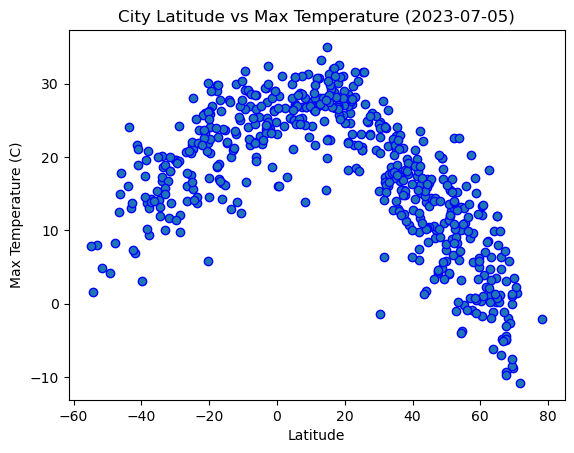

In [68]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolor ='b')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Max Temperature (2023-07-05)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

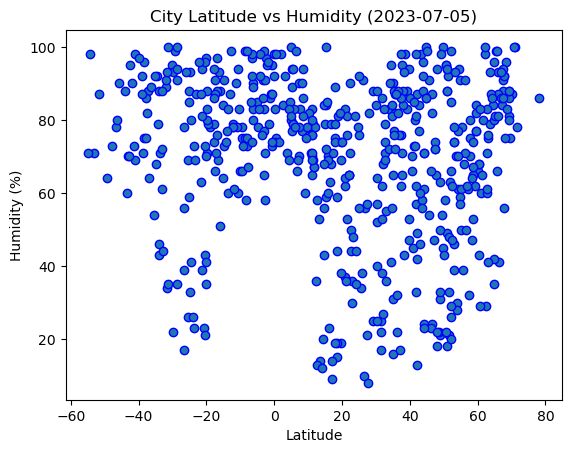

In [69]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolor ='b')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Humidity (2023-07-05)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

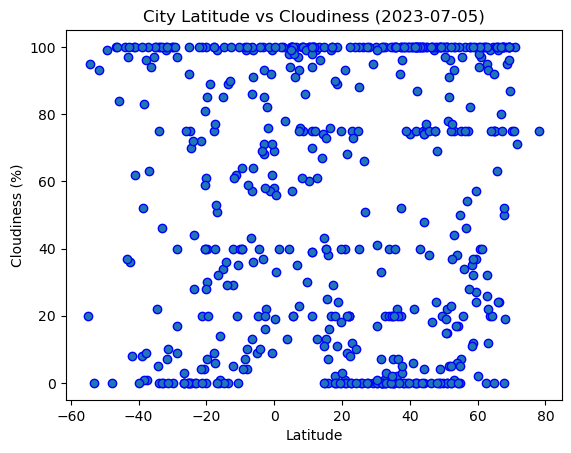

In [70]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolor ='b')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Cloudiness (2023-07-05)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

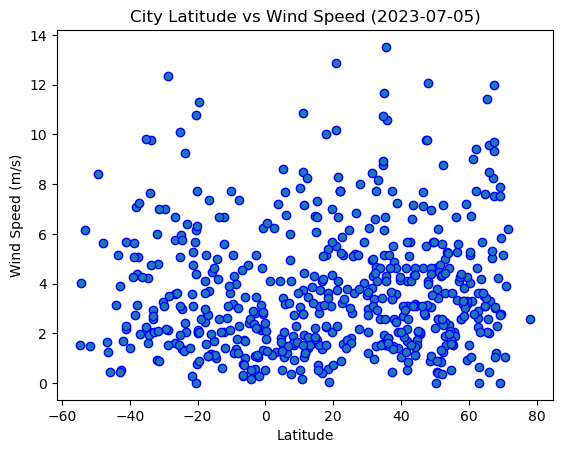

In [71]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolor ='b')


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Wind Speed (2023-07-05)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
Needed packages already imported above # YOUR CODE HERE

In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ribeira grande,38.5167,-28.7000,17.65,98,100,3.58,PT,1683513352
5,ust-nera,64.5667,143.2000,3.51,84,100,3.49,RU,1683513353
6,waddan,29.1614,16.1390,20.98,25,95,4.02,LY,1683513353
7,hamilton,39.1834,-84.5333,18.92,88,0,2.06,US,1683513103
9,darnah,32.7670,22.6367,17.13,79,0,4.67,LY,1683513355


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,26.03,94,20,3.09,CK,1683513351
1,blackmans bay,-43.0167,147.3167,13.07,70,97,3.91,AU,1683513351
3,adamstown,-25.0660,-130.1015,21.67,59,100,10.11,PN,1683513352
4,margaret river,-33.9500,115.0667,20.19,43,100,7.66,AU,1683513352
8,alice springs,-23.7000,133.8833,13.75,23,28,9.26,AU,1683513354


###  Temperature vs. Latitude Linear Regression Plot

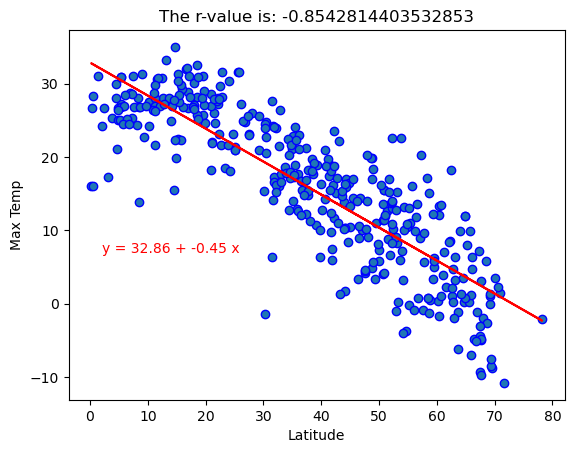

In [96]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)} x'
y_predict = intercept + (slope*x_values)

plt.scatter(x_values, y_values, edgecolor ='b')
plt.plot(x_values,y_predict,color='r')
plt.annotate(line_eq, (2,7), color ='r')
plt.title(f'The r-value is: {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Show plot
plt.show()

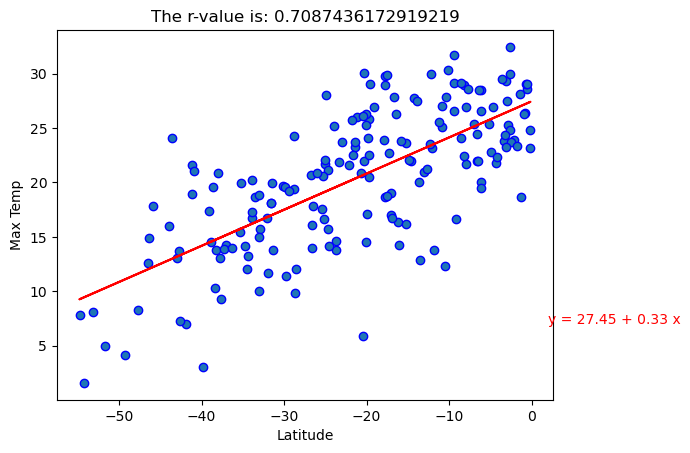

In [98]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)} x'
y_predict = intercept + (slope*x_values)

plt.scatter(x_values, y_values, edgecolor ='b')
plt.plot(x_values,y_predict,color='r')
plt.annotate(line_eq, (2,7), color ='r')
plt.title(f'The r-value is: {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

* There seems to be a clear pattern on both charts.
* On the northern hemisphere, the higher the latitude, the lower the max temperature (this is a negative trend, denoted by negative r).
* On the souther hemisphere, the higher the latitude the higher the max temperature (this is a positive trend, denoted by positive r).
* From both charts, the linear relationship is the strongest in the northern hemisphere, as r is closer to -1, and the points are much closer together on the line.

### Humidity vs. Latitude Linear Regression Plot

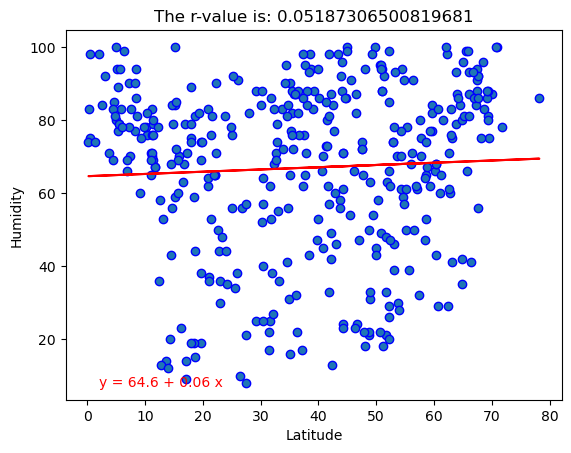

In [100]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)} x'
y_predict = intercept + (slope*x_values)

plt.scatter(x_values, y_values, edgecolor ='b')
plt.plot(x_values,y_predict,color='r')
plt.annotate(line_eq, (2,7), color ='r')
plt.title(f'The r-value is: {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

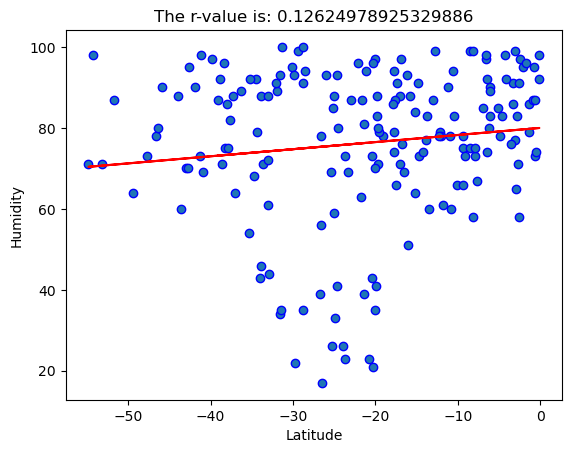

In [101]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)} x'
y_predict = intercept + (slope*x_values)

plt.scatter(x_values, y_values, edgecolor ='b')
plt.plot(x_values,y_predict,color='r')
plt.annotate(line_eq, (2,7), color ='r')
plt.title(f'The r-value is: {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

* On the northern hemisphere, the higher the latitude, the higher the humidity (this is a positive trend, denoted by positive r).
* On the southern hemisphere, the higher the latitude, also the higher the humidity (this is a positive trend, denoted by positive r).
* From both charts, the linear relationship is the strongest in the southern hemisphere, as r is closer to 1. However both charts have points that are very scattered away.

### Cloudiness vs. Latitude Linear Regression Plot

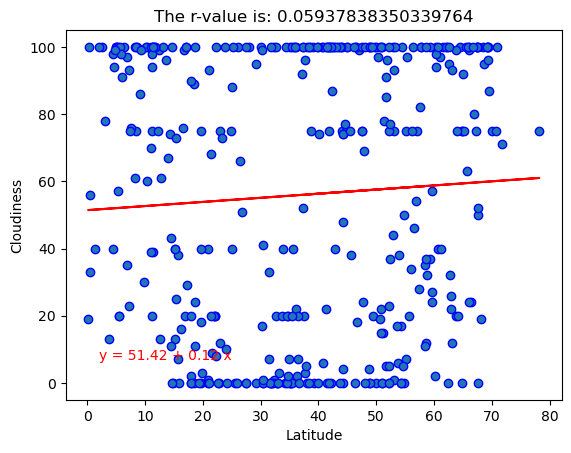

In [107]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)} x'
y_predict = intercept + (slope*x_values)

plt.scatter(x_values, y_values, edgecolor ='b')
plt.plot(x_values,y_predict,color='r')
plt.annotate(line_eq, (2,7), color ='r')
plt.title(f'The r-value is: {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show plot
plt.show()

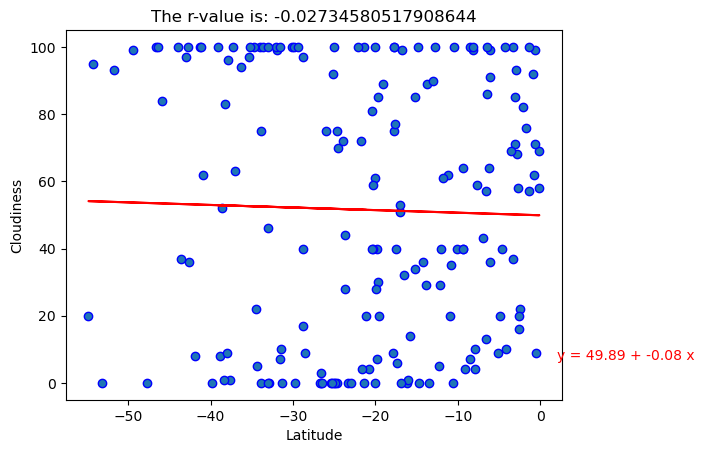

In [108]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)} x'
y_predict = intercept + (slope*x_values)

plt.scatter(x_values, y_values, edgecolor ='b')
plt.plot(x_values,y_predict,color='r')
plt.annotate(line_eq, (2,7), color ='r')
plt.title(f'The r-value is: {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

* On the northern hemisphere, the higher the latitude, the higher the cloudiness (this is a positive trend, denoted by positive r).
* On the southern hemisphere, the higher the latitude, the lower the cloudiness (this is a negative trend, denoted by negative r).
* From both charts, the linear relationship is the strongest in the northern hemisphere, as r is closer to 1. However both charts have points that are very scattered away.

### Wind Speed vs. Latitude Linear Regression Plot

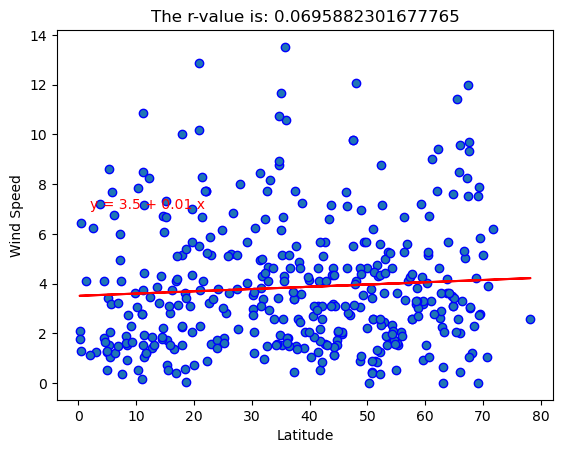

In [109]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)} x'
y_predict = intercept + (slope*x_values)

plt.scatter(x_values, y_values, edgecolor ='b')
plt.plot(x_values,y_predict,color='r')
plt.annotate(line_eq, (2,7), color ='r')
plt.title(f'The r-value is: {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Show plot
plt.show()

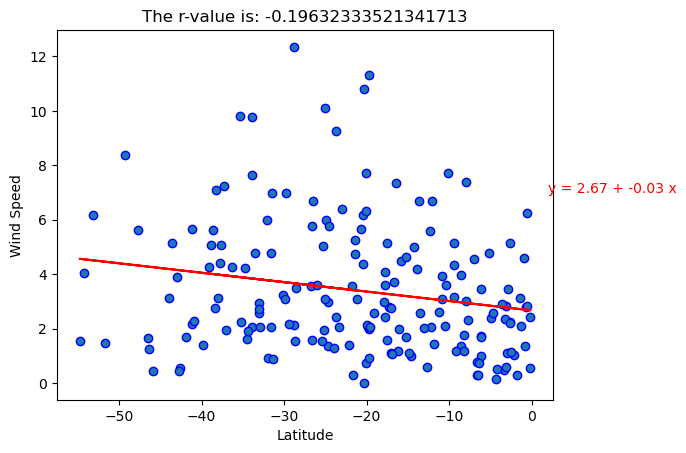

In [110]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)} x'
y_predict = intercept + (slope*x_values)

plt.scatter(x_values, y_values, edgecolor ='b')
plt.plot(x_values,y_predict,color='r')
plt.annotate(line_eq, (2,7), color ='r')
plt.title(f'The r-value is: {rvalue}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

* On the northern hemisphere, the higher the latitude, the higher the wind speed (this is a positive trend, denoted by positive r).
* On the southern hemisphere, the higher the latitude, the lower the wind speed (this is a negative trend, denoted by negative r).
* From both charts, the linear relationship is the strongest in the southern hemisphere, as r is closer to -1. However both charts have points that are very scattered away.